In [40]:
import pandas as pd
import os
import numpy as np
import scipy.stats

In [41]:
# Mouse
file_in_ls = 'ls_w2_mm'
path_in_bw_cf = '/media/vetbio/KH_4TB/ChIP_processed/02_Signal/bw_pval'
path_in_bw_com = '/media/vetbio/Extend_03/210301_Main_Ref_Epi/01_Public/02_Mouse_ChIP'
path_in_bed_cf = '02_ortho_bed_w2species/cf3_mm10'
path_in_bed_com = '01_merge_bed/mm10'

path_out = '03_bw_signal_w2_cf_mm'

In [42]:
ls_process = ['k4me3_pro', 'k4me1_pro', 'k27ac_pro', 'k4me1_enh', 'k27ac_enh', 'k4me3_het', 'k4me1_het', 'k27ac_het', 'k27me3_het']
ls_tissue = ['CL','CO', 'KI', 'LI', 'LU', 'MG', 'OV', 'PA', 'SP' ,'ST']
ls_region = ['pro', 'enh', 'het']
ls_mark = ['k4me3', 'k4me1', 'k27ac', 'k27me3', 'k9me3']

pd_hm_pearson = pd.DataFrame(index=ls_tissue, columns=ls_process)
pd_hm_spearman = pd.DataFrame(index=ls_tissue, columns=ls_process)

In [43]:
"""
# Calculate bw signal
with open(file_in_ls, 'r') as ls_tissue_mark:
    for line in ls_tissue_mark:
        tissue = line.strip().split('\t')[0]
        mark = line.strip().split('\t')[1]
        for region in ls_region:
            if f'{mark}_{region}' in ls_process:
                print(f'## {tissue}, {mark}, {region}')
                
                ## set name of input and output
                in_bw_cf = f'{path_in_bw_cf}/ChIP_{tissue}_{mark}_pval.signal.bigwig'
                in_bw_com = f'{path_in_bw_com}/{tissue}_{mark}_mm10.bw'
                in_bed_cf = f'{path_in_bed_cf}/{tissue}_cf3_{region}_ortho_mm10.bed'
                in_bed_com = f'{path_in_bed_com}/{tissue}_mm10_{region}.bed'
                out_cf_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_cf.txt'
                out_com_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_mm.txt'
                
                ## Run command
                cmd_cf = f'./bigWigAverageOverBed {in_bw_cf} {in_bed_cf} {out_cf_txt}'
                cmd_com = f'./bigWigAverageOverBed {in_bw_com} {in_bed_com} {out_com_txt}'
                print(cmd_cf)
                os.system(cmd_cf)
                print(cmd_com)
                os.system(cmd_com)
"""

"\n# Calculate bw signal\nwith open(file_in_ls, 'r') as ls_tissue_mark:\n    for line in ls_tissue_mark:\n        tissue = line.strip().split('\t')[0]\n        mark = line.strip().split('\t')[1]\n        for region in ls_region:\n            if f'{mark}_{region}' in ls_process:\n                print(f'## {tissue}, {mark}, {region}')\n                \n                ## set name of input and output\n                in_bw_cf = f'{path_in_bw_cf}/ChIP_{tissue}_{mark}_pval.signal.bigwig'\n                in_bw_com = f'{path_in_bw_com}/{tissue}_{mark}_mm10.bw'\n                in_bed_cf = f'{path_in_bed_cf}/{tissue}_cf3_{region}_ortho_mm10.bed'\n                in_bed_com = f'{path_in_bed_com}/{tissue}_mm10_{region}.bed'\n                out_cf_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_cf.txt'\n                out_com_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_mm.txt'\n                \n                ## Run command\n                cmd_cf = f'./bigWigAverageOverB

In [44]:
# Calculate corr. & pval and merge results
count = 1

with open(file_in_ls, 'r') as ls_tissue_mark:
    for line in ls_tissue_mark:
        tissue = line.strip().split('\t')[0]
        mark = line.strip().split('\t')[1]
        for region in ls_region:
            if f'{mark}_{region}' in ls_process:
                print(f'## {tissue}, {mark}, {region}')
                
                ## set name of input and output
                in_cf_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_cf.txt'
                in_com_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_w2_mm.txt'
                

                pd_bw_cf = pd.read_csv(in_cf_txt, sep='\t', header=None, index_col=0)[4]
                pd_bw_com = pd.read_csv(in_com_txt, sep='\t', header=None, index_col=0)[4]
                pd_mg = pd.concat([pd_bw_cf, pd_bw_com], axis=1)
                pd_mg.columns = ['cf', 'com']               
                
                
                ls_p = scipy.stats.pearsonr(pd_mg['cf'], pd_mg['com'])
                ls_s = scipy.stats.spearmanr(pd_mg['cf'], pd_mg['com'])
                    
                pd_hm_pearson.loc[tissue, f'{mark}_{region}'] = round(ls_p[0], 6)
                pd_hm_spearman.loc[tissue, f'{mark}_{region}'] = round(ls_s[0], 6)

## CL, k4me3, pro
## CL, k4me3, het
## CL, k4me1, pro
## CL, k4me1, enh
## CL, k4me1, het
## CL, k27ac, pro
## CL, k27ac, enh
## CL, k27ac, het
## CL, k27me3, het
## KI, k4me3, pro
## KI, k4me3, het
## KI, k4me1, pro
## KI, k4me1, enh
## KI, k4me1, het
## KI, k27ac, pro
## KI, k27ac, enh
## KI, k27ac, het
## KI, k27me3, het
## LI, k4me3, pro
## LI, k4me3, het
## LI, k4me1, pro
## LI, k4me1, enh
## LI, k4me1, het
## LI, k27ac, pro
## LI, k27ac, enh
## LI, k27ac, het
## LI, k27me3, het
## LU, k4me3, pro
## LU, k4me3, het
## LU, k4me1, pro
## LU, k4me1, enh
## LU, k4me1, het
## SP, k4me3, pro
## SP, k4me3, het
## SP, k4me1, pro
## SP, k4me1, enh
## SP, k4me1, het
## SP, k27ac, pro
## SP, k27ac, enh
## SP, k27ac, het
## SP, k27me3, het


In [45]:
pd_hm_pearson_rmNA = pd_hm_pearson.fillna(-1)
pd_hm_pearson_rmNA_rm0 = pd_hm_pearson_rmNA[pd_hm_pearson_rmNA.sum(axis=1) != -6]

pd_hm_spearman_rmNA = pd_hm_spearman.fillna(0)
pd_hm_spearman_rmNA_rm0 = pd_hm_spearman_rmNA[pd_hm_spearman_rmNA.sum(axis=1) != 0]

In [46]:
pd_hm_spearman_rmNA_rm0.to_csv('HM_w2_mm_spearman_rmNA_rm0.txt', sep='\t')

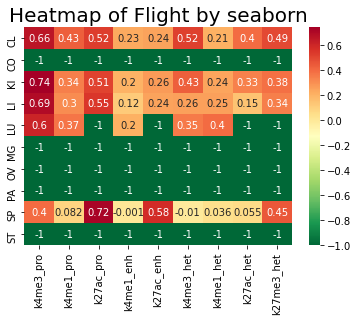

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(pd_hm_pearson_rmNA_rm0, cmap='RdYlGn_r', annot=True)

plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.show() 

In [48]:
pd_hm_spearman_rmNA_rm0.max().max()

0.748173

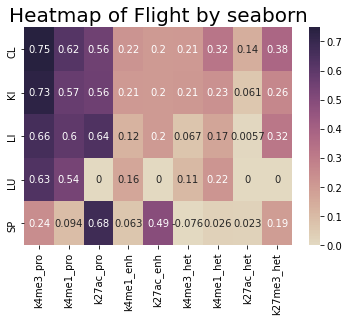

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(pd_hm_spearman_rmNA_rm0, 
                 cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),
                 vmin=0, vmax=0.748173,
                 annot=True)
#ax = sns.heatmap(pd_hm_spearman_rmNA_rm0.drop(index = 'SP'), 
#                 cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
#                 annot=True)

plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.savefig('HM_w2_mm_spearman_rmNA_rm0.pdf')

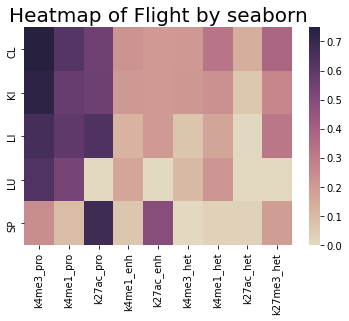

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(pd_hm_spearman_rmNA_rm0, 
                 cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),
                 vmin=0, vmax=0.748173)

plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.savefig('HM_w2_mm_spearman_rmNA_rm0_noAnn.pdf')